In [1]:
import numpy as np

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Load shapefiles

In [2]:
ca_state_outline = gpd.read_file('/home/jovyan/shared/deep_well/data/shapefiles/california_state_outline/CA_State_TIGER2016.shp')

In [3]:
ca_state_outline.to_crs(epsg=4326, inplace=True)

In [4]:
ca_state_outline.crs

{'init': 'epsg:4326', 'no_defs': True}

In [5]:
cv_outline = gpd.read_file('/home/jovyan/shared/deep_well/data/shapefiles/central_valley_shapfile/Alluvial_Bnd.shp')

In [6]:
cv_outline.to_crs(epsg=4326, inplace=True)

In [7]:
cv_outline.crs

{'init': 'epsg:4326', 'no_defs': True}

# Look at continuous well data

In [8]:
!ls /home/jovyan/shared/deep_well/data/well_data/cnra_continuous_gwl

continuousgroundwaterdaily.csv	  gwlstations.csv
continuousgroundwatermonthly.csv  README


## Load stations

In [9]:
df_cont_stations = pd.read_csv('/home/jovyan/shared/deep_well/data/well_data/cnra_continuous_gwl/gwlstations.csv')

In [10]:
df_cont_stations.head(2)

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft b...,MRL-2W,37.886056,-121.481833,NAD83,1.0,6.9,NaN,1.0,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft b...,MRL-3W,37.884861,-121.482167,NAD83,1.0,-1.0,NaN,1.0,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q002M is part of a well cluster. Othe...


In [11]:
gdf_cont_stations = gpd.GeoDataFrame(df_cont_stations, geometry=gpd.points_from_xy(df_cont_stations['LONGITUDE'], df_cont_stations['LATITUDE']))

In [12]:
gdf_cont_stations.crs = {'init' :'epsg:4326'}

In [13]:
gdf_cont_stations.head()

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,...,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT,geometry
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft b...,MRL-2W,37.886056,-121.481833,NAD83,1.0,6.9,NaN,...,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q001M is part of a well cluster. Othe...,POINT (-121.48183333 37.88605556)
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft b...,MRL-3W,37.884861,-121.482167,NAD83,1.0,-1.0,NaN,...,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q002M is part of a well cluster. Othe...,POINT (-121.48216667 37.88486111)
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bg...,MLNO-2,37.886028,-121.481917,NAD83,1.0,8.6,NaN,...,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q003M is part of a well cluster. Othe...,POINT (-121.48191667 37.88602778)
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bg...,MLNO-1,37.885028,-121.482000,NAD83,1.0,15.9,NaN,...,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01N04E36Q004M is part of a well cluster. Othe...,POINT (-121.482 37.88502778)
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,1.0,16.1,NaN,...,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,http://wdl.water.ca.gov/waterdatalibrary/docs/...,01S04E28F001M is part of a well cluster. Othe...,POINT (-121.54433333 37.81855556)


### Map of all continuous wells

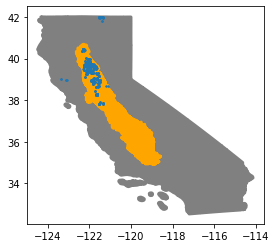

In [14]:
#fig,axes = plt.subplots(1, 2, figsize = (20,15))
ax = ca_state_outline.plot(color='gray', edgecolor='gray', linewidth=3)
cv_outline.plot(ax=ax, color='orange', edgecolor='orange', linewidth=3)
gdf_cont_stations.plot(ax=ax, markersize=2)

## Load monthly data

In [15]:
df_cont_monthly = pd.read_csv('/home/jovyan/shared/deep_well/data/well_data/cnra_continuous_gwl/continuousgroundwatermonthly.csv')

In [16]:
df_cont_monthly.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-05-01,9.1,1,6.9,1,17.44,1,15.238,1,-8.338,1
1,01N04E36Q001M,2005-06-01,9.1,1,6.9,1,17.33,1,15.130,1,-8.230,1
2,01N04E36Q001M,2005-07-01,9.1,1,6.9,1,17.36,1,15.161,1,-8.261,1
3,01N04E36Q001M,2005-08-01,9.1,1,6.9,1,17.51,1,15.313,1,-8.413,1
4,01N04E36Q001M,2005-09-01,9.1,1,6.9,1,17.89,1,15.690,1,-8.790,1


In [17]:
gdf_cont_monthly = df_cont_monthly[['STATION','MSMT_DATE','GSE_WSE','WSE']].merge(
    df_cont_stations[['STATION','LATITUDE','LONGITUDE','WELL_DEPTH','ELEV','LLDATUM']], on='STATION', how='left')

In [18]:
gdf_cont_monthly.head()

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,6.9,NAD83
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,6.9,NAD83
2,01N04E36Q001M,2005-07-01,15.161,-8.261,37.886056,-121.481833,81.0,6.9,NAD83
3,01N04E36Q001M,2005-08-01,15.313,-8.413,37.886056,-121.481833,81.0,6.9,NAD83
4,01N04E36Q001M,2005-09-01,15.690,-8.790,37.886056,-121.481833,81.0,6.9,NAD83


In [19]:
gdf_cont_monthly = gpd.GeoDataFrame(
    gdf_cont_monthly,geometry=gpd.points_from_xy(gdf_cont_monthly['LONGITUDE'], gdf_cont_monthly['LATITUDE']))

In [20]:
gdf_cont_monthly.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM,geometry
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)


## Load daily data

In [21]:
df_cont_daily = pd.read_csv('/home/jovyan/shared/deep_well/data/well_data/cnra_continuous_gwl/continuousgroundwaterdaily.csv')

In [22]:
df_cont_daily.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-04-30,9.1,1,6.9,1,17.35,1,15.154,1,-8.254,1
1,01N04E36Q001M,2005-05-01,9.1,1,6.9,1,17.35,1,15.148,1,-8.248,1
2,01N04E36Q001M,2005-05-02,9.1,1,6.9,1,17.34,1,15.143,1,-8.243,1
3,01N04E36Q001M,2005-05-03,9.1,1,6.9,1,17.36,1,15.158,1,-8.258,1
4,01N04E36Q001M,2005-05-04,9.1,1,6.9,1,17.35,1,15.154,1,-8.254,1


In [23]:
gdf_cont_daily = df_cont_daily[['STATION','MSMT_DATE','GSE_WSE','WSE']].merge(
    df_cont_stations[['STATION','LATITUDE','LONGITUDE','WELL_DEPTH','ELEV','LLDATUM']], on='STATION', how='left')

In [24]:
gdf_cont_daily.head()

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM
0,01N04E36Q001M,2005-04-30,15.154,-8.254,37.886056,-121.481833,81.0,6.9,NAD83
1,01N04E36Q001M,2005-05-01,15.148,-8.248,37.886056,-121.481833,81.0,6.9,NAD83
2,01N04E36Q001M,2005-05-02,15.143,-8.243,37.886056,-121.481833,81.0,6.9,NAD83
3,01N04E36Q001M,2005-05-03,15.158,-8.258,37.886056,-121.481833,81.0,6.9,NAD83
4,01N04E36Q001M,2005-05-04,15.154,-8.254,37.886056,-121.481833,81.0,6.9,NAD83


In [25]:
gdf_cont_daily = gpd.GeoDataFrame(
    gdf_cont_daily,geometry=gpd.points_from_xy(gdf_cont_daily['LONGITUDE'], gdf_cont_daily['LATITUDE']))

In [26]:
gdf_cont_daily.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM,geometry
0,01N04E36Q001M,2005-04-30,15.154,-8.254,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-05-01,15.148,-8.248,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)


# Look at periodic well data

In [27]:
!ls /home/jovyan/shared/deep_well/data/cnra_periodic_gwl

measurements.csv  perforations.csv  README  stations.csv


## Load stations

In [28]:
df_prd_stations = pd.read_csv('/home/jovyan/shared/deep_well/data/well_data/cnra_periodic_gwl/stations.csv')

In [29]:
df_prd_stations.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,WLM_METHOD,WLM_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN


In [30]:
gdf_prd_stations = gpd.GeoDataFrame(df_prd_stations, geometry=gpd.points_from_xy(df_prd_stations['LONGITUDE'], df_prd_stations['LATITUDE']))

In [31]:
gdf_prd_stations.crs = {'init' :'epsg:4326'}

In [32]:
gdf_prd_stations.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,WLM_METHOD,WLM_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,geometry
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN,POINT (-121.755 35.5604)
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)


### Map of all periodic wells

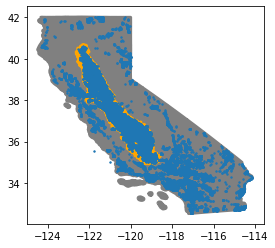

In [33]:
#fig,axes = plt.subplots(1, 2, figsize = (20,15))
ax = ca_state_outline.plot(color='gray', edgecolor='gray', linewidth=3)
cv_outline.plot(ax=ax, color='orange', edgecolor='orange', linewidth=3)
gdf_prd_stations.plot(ax=ax, markersize=2)

## Load periodic data

In [34]:
df_prd_prd = pd.read_csv('/home/jovyan/shared/deep_well/well_data/data/cnra_periodic_gwl/measurements.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df_prd_prd.head(2)

,STN_ID,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,RDNG_WS,RDNG_RP,WSE,RPE_WSE,GSE_WSE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_ID,WLM_ORG_NAME,MSMT_CMT,COOP_AGENCY_ORG_ID,COOP_ORG_NAME
0,2000,341081N1188965W001,1645374,1979-04-19 00:00:00,2077.61,2077.61,0.0,100.2,1977.41,100.2,100.2,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT
1,2001,341067N1188976W001,1645375,1979-04-19 00:00:00,2077.61,2077.61,0.0,116.7,1960.91,116.7,116.7,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT


In [36]:
gdf_prd_prd = df_prd_prd[['STN_ID','MSMT_DATE','GSE_WSE','WSE']].merge(
    df_prd_stations[['STN_ID','LATITUDE','LONGITUDE','WELL_DEPTH']], on='STN_ID', how='left')

In [37]:
gdf_prd_prd.head()

,STN_ID,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH
0,2000,1979-04-19 00:00:00,100.2,1977.41,34.1081,-118.897,NaN
1,2001,1979-04-19 00:00:00,116.7,1960.91,34.1067,-118.898,NaN
2,2002,1979-04-19 00:00:00,NaN,NaN,34.1072,-118.944,NaN
3,2003,1979-04-18 00:00:00,10.2,1442.43,34.1019,-118.956,NaN
4,2004,1979-04-18 00:00:00,55.4,1447.21,34.0953,-118.959,NaN


In [38]:
gdf_prd_prd = gpd.GeoDataFrame(
    gdf_prd_prd,geometry=gpd.points_from_xy(gdf_prd_prd['LONGITUDE'], gdf_prd_prd['LATITUDE']))

In [39]:
gdf_prd_prd.head(2)

,STN_ID,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry
0,2000,1979-04-19 00:00:00,100.2,1977.41,34.1081,-118.897,NaN,POINT (-118.897 34.1081)
1,2001,1979-04-19 00:00:00,116.7,1960.91,34.1067,-118.898,NaN,POINT (-118.898 34.1067)


# Create one file for all well measurements

In [40]:
gdf_cont_daily.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM,geometry
0,01N04E36Q001M,2005-04-30,15.154,-8.254,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-05-01,15.148,-8.248,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)


In [41]:
gdf_cont_monthly.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM,geometry
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)


In [42]:
gdf_prd_prd.head(2)

,STN_ID,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry
0,2000,1979-04-19 00:00:00,100.2,1977.41,34.1081,-118.897,NaN,POINT (-118.897 34.1081)
1,2001,1979-04-19 00:00:00,116.7,1960.91,34.1067,-118.898,NaN,POINT (-118.898 34.1067)


## Aggregate periodic well measurements to monthly timescale

In [43]:
gdf_prd_prd['MSMT_DATE'] = pd.to_datetime(gdf_prd_prd['MSMT_DATE'])

In [44]:
gdf_prd_prd['MSMT_DATE1'] = gdf_prd_prd['MSMT_DATE'].apply(lambda t: t.strftime('%Y-%m') + '-01')

In [45]:
gdf_prd_prd.head(2)

,STN_ID,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry,MSMT_DATE1
0,2000,1979-04-19,100.2,1977.41,34.1081,-118.897,NaN,POINT (-118.897 34.1081),1979-04-01
1,2001,1979-04-19,116.7,1960.91,34.1067,-118.898,NaN,POINT (-118.898 34.1067),1979-04-01


In [53]:
gdfppgb = gdf_prd_prd[['STN_ID','MSMT_DATE1','GSE_WSE','WSE','WELL_DEPTH','LATITUDE','LONGITUDE']].groupby(['STN_ID','MSMT_DATE1'])

In [54]:
gdf_prd_monthly = gdfppgb.mean()

In [55]:
gdf_prd_monthly.reset_index(inplace=True)

In [57]:
gdf_prd_monthly.head(10)

,STN_ID,MSMT_DATE1,GSE_WSE,WSE,WELL_DEPTH,LATITUDE,LONGITUDE
0,2000,1979-04-01,100.2,1977.41,NaN,34.1081,-118.897
1,2001,1979-04-01,116.7,1960.91,NaN,34.1067,-118.898
2,2002,1979-04-01,NaN,NaN,NaN,34.1072,-118.944
3,2003,1979-04-01,10.2,1442.43,NaN,34.1019,-118.956
4,2004,1979-04-01,55.4,1447.21,NaN,34.0953,-118.959
5,2005,1979-04-01,40.2,1362.40,NaN,34.0894,-118.960
6,2006,2011-11-01,37.0,-17.50,NaN,38.0996,-121.352
7,2006,2012-04-01,36.0,-16.50,NaN,38.0996,-121.352
8,2006,2012-11-01,40.0,-20.50,NaN,38.0996,-121.352
9,2006,2013-03-01,36.5,-17.00,NaN,38.0996,-121.352


In [58]:
gdf_prd_monthly = gpd.GeoDataFrame(
    gdf_prd_monthly,geometry=gpd.points_from_xy(gdf_prd_monthly['LONGITUDE'], gdf_prd_monthly['LATITUDE']))

In [59]:
gdf_prd_monthly.rename(
    columns={'MSMT_DATE1':'MSMT_DATE'},inplace=True)

In [60]:
gdf_prd_monthly.head()

,STN_ID,MSMT_DATE,GSE_WSE,WSE,WELL_DEPTH,LATITUDE,LONGITUDE,geometry
0,2000,1979-04-01,100.2,1977.41,NaN,34.1081,-118.897,POINT (-118.897 34.1081)
1,2001,1979-04-01,116.7,1960.91,NaN,34.1067,-118.898,POINT (-118.898 34.1067)
2,2002,1979-04-01,NaN,NaN,NaN,34.1072,-118.944,POINT (-118.944 34.1072)
3,2003,1979-04-01,10.2,1442.43,NaN,34.1019,-118.956,POINT (-118.956 34.1019)
4,2004,1979-04-01,55.4,1447.21,NaN,34.0953,-118.959,POINT (-118.959 34.0953)


## Aggregate to one monthly file

In [61]:
gdf_cont_monthly.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,ELEV,LLDATUM,geometry
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,6.9,NAD83,POINT (-121.48183333 37.88605556)


In [62]:
gdf_prd_monthly.head(2)

,STN_ID,MSMT_DATE,GSE_WSE,WSE,WELL_DEPTH,LATITUDE,LONGITUDE,geometry
0,2000,1979-04-01,100.2,1977.41,NaN,34.1081,-118.897,POINT (-118.897 34.1081)
1,2001,1979-04-01,116.7,1960.91,NaN,34.1067,-118.898,POINT (-118.898 34.1067)


In [64]:
gdf_prd_monthly.rename(
    columns={'STN_ID':'STATION'}, inplace=True)

In [66]:
gdf_cont_monthly = gdf_cont_monthly[['STATION','MSMT_DATE','GSE_WSE','WSE','LATITUDE','LONGITUDE','WELL_DEPTH','geometry']]

In [68]:
gdf_prd_monthly = gdf_prd_monthly[['STATION','MSMT_DATE','GSE_WSE','WSE','LATITUDE','LONGITUDE','WELL_DEPTH','geometry']]

In [69]:
gdf_cont_monthly.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556)


In [81]:
gdf_prd_monthly['PRD_OR_CONT'] = np.zeros(gdf_prd_monthly.shape[0])
gdf_prd_monthly['PRD_OR_CONT'] = gdf_prd_monthly['PRD_OR_CONT'].astype(int)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
gdf_cont_monthly['PRD_OR_CONT'] = np.ones(gdf_cont_monthly.shape[0])
gdf_cont_monthly['PRD_OR_CONT'] = gdf_cont_monthly['PRD_OR_CONT'].astype(int)

In [86]:
gdf_prd_monthly.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry,PRD_OR_CONT
0,2000,1979-04-01,100.2,1977.41,34.1081,-118.897,NaN,POINT (-118.897 34.1081),0
1,2001,1979-04-01,116.7,1960.91,34.1067,-118.898,NaN,POINT (-118.898 34.1067),0


## Concatenate and save out as csv!

In [91]:
frames = [gdf_cont_monthly, gdf_prd_monthly]

In [92]:
finalresult = pd.concat(frames)

In [93]:
finalresult.head()

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,geometry,PRD_OR_CONT
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556),1
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556),1
2,01N04E36Q001M,2005-07-01,15.161,-8.261,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556),1
3,01N04E36Q001M,2005-08-01,15.313,-8.413,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556),1
4,01N04E36Q001M,2005-09-01,15.690,-8.790,37.886056,-121.481833,81.0,POINT (-121.48183333 37.88605556),1


In [94]:
finalresult.shape

(1446639, 9)

In [95]:
finalresult.to_csv('ca_well_data.csv')

# Looking at date ranges

In [101]:
gdf_prd_monthly['MSMT_DATE'].min()

'1888-01-01'

In [104]:
gdf_prd_monthly['MSMT_DATE'].max()

'2019-09-01'

In [103]:
gdf_cont_monthly['MSMT_DATE'].min()

'1992-04-01'

In [102]:
gdf_cont_monthly['MSMT_DATE'].max()

'2019-03-01'

# Save out as shapefile

In [105]:
finalresult.to_file("ca_well_data.shp")